# Introduction

In this project, we will look into the data from Seattle Airbnb which is public and can be accessed from Kaggle. It contains three tables which are listings, calendar and reviews. The listings contains 3818 entries and 92 columns, such as neighbourhood, price and bed type etc. For calendar dataset it contains 1393570 entries and 4 columns, such as date and price. There are lots of data that we will not be using here but still be valuable to dive deep into to better understand the relationship with the price and other variables. 

# Business Understanding

In order to run a newly start host business, understanding the data of Airbnb and one's city is crucial to the success of the business. To build the knowledge of the Airbnb business in one's city, it is important to look at the period of peak season, the review score system and also the factors in determining the price. In this project we will just analyse two of them which are listings and calendars and in attempt to answer the following three questions:

<li>When is the peak season for Airbnb Seattle?</li><br>
<li>The longer you run, the better review score you get?</li><br>
<li>What are the most important factors in determining the price?</li>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Gather Data

In [2]:
#load csv file into dataframe
df_listings = pd.read_csv("listings.csv")
df_reviews = pd.read_csv("reviews.csv")
df_calendar = pd.read_csv("calendar.csv")

In [3]:
#set to display the maximum columns available
pd.set_option("display.max_columns", None)

# Assess Data

In [4]:
#check 5 rows of listings
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
#check quantitative variables 
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
#check if all data types are correct
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [7]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


# Data Understanding

To understand the peak season, we can start with the price or volume of traveler during the period. We will use the price and date column in calendar.csv to see when the peak season is for Seattle. We have an underlying assumption which is that the highest months are the peak season due to lack of supply. This can also be applied to other city to find out the peak season and better arrange and prepare beforehand so the host would not be shocked by the sudden surge of staying request.<br>

To understand how review score varies by year, we can use the review_scores_rating and host_since in listings.csv to discover the trend.<br>

How the price is affected by other factors can be understood through building a linear regression model. Factors concerned are superhost status, review scores, neighbourhood, property/room/bed type, numbers of bedrooms, bath rooms or beds etc. and the relevant data columns in listings are host_is_superhost, review_scores_rating, host_neighbourhood, property_type, room_type etc. which will be seen shortly in the X variable holding all the explanatory variables. y will be the response variable which is price column in the listings.csv.

# Preparation of Data

# Clean Data

For listings dataset, we can see that some data type like price is not in float nor int format. We will have to change it so that we can do the calculation. Also date is not in datetime object format.

For calendar dataset, we can see that date is not in datetime object format and price is not float nor int. We will also need to change that to answer our questions.

Since we want to just look at those days with price so that we can analyse how the price changes with each month. We can check whether if that listing is available means the price must be attached to it.

In [8]:
#check null for price when availability is true
df_calendar[df_calendar.available == "t"].price.isnull().sum()

0

In [9]:
#Change the date to datetime format
df_calendar.date = pd.to_datetime(df_calendar.date)

In [10]:
def price_to_int(df):
    """ turn price format in a panda dataframe from string $XXX.XX to int
        Dollar sign $, comma and .XX are removed       
    """
    return df.apply(lambda x: int(x[1:-3].replace(",","")))

In [11]:
#All the price are in $XXX.XX string format so we need to remove special character and cast it as int
df_calendar.price = price_to_int(df_calendar[df_calendar.available == "t"].price)

In [12]:
#group the mean price by month
price_by_month = df_calendar.price.groupby(df_calendar.date.dt.strftime('%m')).mean().sort_values()
price_by_month

date
01    122.912176
02    124.293927
03    128.644488
04    135.097005
11    135.688738
10    137.031939
12    137.251835
05    139.538183
09    143.255949
06    147.473137
08    150.656594
07    152.094150
Name: price, dtype: float64

In [13]:
def plot_bar(x_value, y_value, xlabel = "", ylabel = "", title = ""):
    """
    plot the bar chart
    """
    plt.bar(x_value, y_value)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

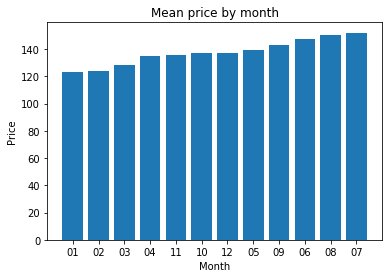

In [14]:
#Plot price by month
plot_bar(price_by_month.index, price_by_month.values,\
         xlabel = "Month", ylabel = "Price", title = "Mean price by month")

We can observe from this chart that the peak season is around June to August, with mean price \\$147 from June to \\$152 in August.

### The longer you run, the better review score you get?

In [15]:
#change string to datetime format
df_listings.host_since = pd.to_datetime(df_listings.host_since)

In [16]:
#Group review rating median by host since year
median_review_score_by_year = df_listings.review_scores_rating.groupby\
(df_listings.host_since.dt.strftime('%Y')).median()
median_review_score_by_year

host_since
2008    92.0
2009    95.0
2010    96.0
2011    95.0
2012    96.0
2013    96.0
2014    97.0
2015    97.0
2016     NaN
Name: review_scores_rating, dtype: float64

In [17]:
#Check review scores for 2016
df_listings[df_listings.host_since >= "2016"].review_scores_rating

53     NaN
1983   NaN
2893   NaN
2955   NaN
3106   NaN
Name: review_scores_rating, dtype: float64

Since all number are NaN value in 2016 so we can drop them and see just the median review score from 2008 to 2015

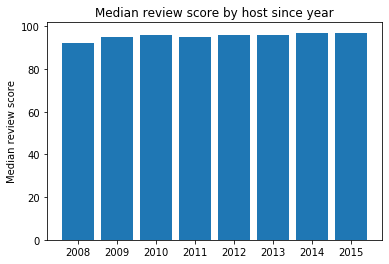

In [18]:
#Plot review scores by host since year
plot_bar(median_review_score_by_year.index[:-1], median_review_score_by_year.values[:-1],\
         ylabel = "Median review score", title = "Median review score by host since year")

We can see the later you become a host, the better your review score is. The median review score rised from 92 in 2008 to 97 in 2015.

# Data Modeling

In [19]:
#Explanatory Variables
X = df_listings[['host_is_superhost','review_scores_rating', \
                 'host_neighbourhood', 'property_type', 'room_type', 'bedrooms', 'bathrooms',\
                 'beds', 'extra_people', 'bed_type', 'accommodates', \
                 'security_deposit', 'guests_included','cleaning_fee',\
                 'cancellation_policy', 'reviews_per_month']]
#Response Variables
y = df_listings['price']

In [20]:
#Check our Explanatory Variables dataframe
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_is_superhost     3816 non-null   object 
 1   review_scores_rating  3171 non-null   float64
 2   host_neighbourhood    3518 non-null   object 
 3   property_type         3817 non-null   object 
 4   room_type             3818 non-null   object 
 5   bedrooms              3812 non-null   float64
 6   bathrooms             3802 non-null   float64
 7   beds                  3817 non-null   float64
 8   extra_people          3818 non-null   object 
 9   bed_type              3818 non-null   object 
 10  accommodates          3818 non-null   int64  
 11  security_deposit      1866 non-null   object 
 12  guests_included       3818 non-null   int64  
 13  cleaning_fee          2788 non-null   object 
 14  cancellation_policy   3818 non-null   object 
 15  reviews_per_month    

In [21]:
#percentage is in string format and we need to change it to float
#All the price are in $XXX.XX string format so we need to remove special character and cast it as int
for var in ['security_deposit', 'cleaning_fee', 'extra_people']:
    X[var] = price_to_int(X[var][X[var].notnull()])
y = price_to_int(y)

/Users/andykwok/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
#Create dummy variables for categorical data
X = pd.get_dummies(X, dummy_na = False, drop_first = True)
#Replace null numeric variables value using mean value as a quick fix
X_numeric = X.select_dtypes(['int', 'float64'])
X[X_numeric.columns] = X_numeric.apply(lambda x: x.fillna(x.mean()))

In [23]:
def build_linear_model(X, y):
    #Instantiate and fit linear model
    lm = LinearRegression(normalize = True)
    lm.fit(X, y)
    return lm

In [24]:
def build_optimal_linear_model(X, y, cut_offs, test_size = 0.30, random_state = 42):
    
    """ Reduce X columns after creating dummies to test how many columns to
        be used for building the linear model with highest test r2 score.
        A list of cutoff values are pass and if sum of the column value is higher than cutoff,
        the column will be kept. So linear model will be fitted with different number of columns.
        
        INPUT:
        X - dataframe object, explantory variables
        y - dataframe object, response variable
        cut_offs - list
        test_size - float, test size for train test split
        random_state - int, random state
        
        OUTPUT:
        return the most optimal linear model with its train and test explaintory and response variable,
        the best r2 score and the linear model
        X_train, X_test, y_train, y_test, r2_score_test, lm_model
        
    """
    
    r2_score_dict = {}
    r2_score_list = []
    
    for cut_off in cut_offs:
        reduced_X = X.iloc[:, np.where((np.sum(X) > cut_off) == True)[0]]
        X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.30, random_state=42)
        lm_model = build_linear_model(X_train, y_train)
        y_preds = lm_model.predict(X_test)
        r2_score_test = r2_score(y_test, y_preds)
        r2_score_dict[str(cut_off)] = r2_score_test
        r2_score_list.append(r2_score_test)
    
    optimised_cutoff_val = max(r2_score_dict, key=r2_score_dict.get)
    
    reduced_X = X.iloc[:, np.where((np.sum(X) > int(optimised_cutoff_val)) == True)[0]]
    X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.30, random_state=42)
    lm_model = build_linear_model(X_train, y_train)
    r2_score_test = r2_score(y_test, y_preds)
    return X_train, X_test, y_train, y_test, r2_score_test, lm_model

In [25]:
#set up the cutoff values
cutoffs = [3500, 2500, 1000, 100, 50, 30, 25, 15, 5, 2]

In [26]:
#build the optimised linear model
X_train, X_test, y_train, y_test, r2_score_test, lm_model = build_optimal_linear_model(X, y, cutoffs)

# Evaluate the results

In [27]:
#r2 score
r2_score_test

0.6036821291331043

The r2 score is not high. We can try to see if the content of the reviews and other variables are helping with the r2 score. But this can explain 60.3% of our price so we can still use the model to explain how our price changes with the features.

In [28]:
#check the coefficient to see which variables are the most important in affecting the price
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.abs(lm_model.coef_)),pd.DataFrame(lm_model.coef_)], axis=1)
coefficients.columns = ['var', 'abs_coef', 'coef']
df_coefficients = coefficients.sort_values(by=['abs_coef'], ascending=False)[:15]
df_coefficients

,var,abs_coef,coef
84,property_type_Boat,107.639516,107.639516
39,host_neighbourhood_Hollywood,72.477994,72.477994
94,room_type_Shared room,71.297974,-71.297974
87,property_type_Camper/RV,66.378786,66.378786
62,host_neighbourhood_Portage Bay,60.905874,60.905874
33,host_neighbourhood_Haller Lake,58.945838,-58.945838
22,host_neighbourhood_Crown Hill,54.008815,-54.008815
61,host_neighbourhood_Pioneer Square,51.923996,51.923996
70,host_neighbourhood_South Delridge,51.215540,-51.215540
72,host_neighbourhood_South Park,49.909381,-49.909381


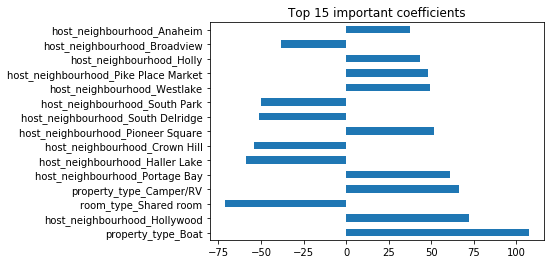

In [29]:
#Plot horizontal bar chart for coefficients
df_coefficients[['var','coef']].plot(kind = 'barh', legend = False)
plt.yticks(np.arange(15),labels=list(df_coefficients['var']))
plt.title("Top 15 important coefficients");

The most important factors affecting the price are property type, neighbourhood and room type. As you can see from the chart. For Seattle, living in a Boat (coef: 108) around Hollywood (coef: 72) is definitely cost a tourist more. And shared room (coef: -71) can push the price down by a hugh amount.

# Conclusion

In this project, we find out that Jun to August is the peak season for Airbnb Host in Seattle. And it is not that the more experienced host are getting higher review score. Instead, if you are a new host, you are more likely to have a better review than the experienced. And we can see that the property type, host neighbourhood and room type affect the price more than other factors like review score and whether the host is superhost or not.